In [ ]:
# ==============================
# Step 1: Import libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import kagglehub, os, glob

# ==============================
# Step 2: Download Dataset
# ==============================
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")
print("Dataset downloaded to:", path)

# List files in dataset folder
print("Files inside dataset folder:", os.listdir(path))

# Automatically detect CSV file
csv_files = glob.glob(path + "/*.csv")
print("CSV files found:", csv_files)

# Load the first CSV file
df = pd.read_csv(csv_files[0])
print("Shape of dataset:", df.shape)
print(df.head())


Dataset downloaded to: /kaggle/input/car-price-predictionused-cars
Files inside dataset folder: ['car data.csv']
CSV files found: ['/kaggle/input/car-price-predictionused-cars/car data.csv']
Shape of dataset: (301, 9)
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# ==============================
# Step 3: Data Cleaning
# ==============================
# Drop duplicates & missing values
df = df.drop_duplicates()
df = df.dropna()

print("After cleaning:", df.shape)
print(df.info())


After cleaning: (299, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   year           299 non-null    int64  
 2   selling_price  299 non-null    float64
 3   present_price  299 non-null    float64
 4   km_driven      299 non-null    int64  
 5   fuel           299 non-null    int64  
 6   seller_type    299 non-null    int64  
 7   transmission   299 non-null    int64  
 8   owner          299 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 23.4+ KB
None


In [ ]:
print("Columns in dataset:")
print(df.columns)


Columns in dataset:
Index(['Car_Name', 'year', 'selling_price', 'present_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner'],
      dtype='object')


In [ ]:
# ==============================
# Step 4: Feature Engineering
# ==============================
df.rename(columns={
    "Year": "year",
    "Selling_Price": "selling_price",
    "Present_Price": "present_price",
    "Driven_kms": "km_driven",
    "Fuel_Type": "fuel",
    "Selling_type": "seller_type",
    "Transmission": "transmission",
    "Owner": "owner"
}, inplace=True)

print("Renamed columns:", df.columns)


Renamed columns: Index(['Car_Name', 'year', 'selling_price', 'present_price', 'km_driven',
       'fuel', 'seller_type', 'transmission', 'owner'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encode categorical columns
label_enc = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col] = label_enc.fit_transform(df[col])
#Select features & target
X = df[['year', 'present_price', 'km_driven', 'fuel',
        'seller_type', 'transmission', 'owner']]
y = df['selling_price']

#Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features prepared:", X.shape)


Features prepared: (299, 7)


In [ ]:
# ==============================
# Step 5: Train-Test Split
# ==============================
from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (239, 7) Test size: (60, 7)


In [ ]:
# ==============================
# Step 6: Train Models
# ==============================
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions using Linear Regression
y_pred_lr = lr.predict(X_test)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions using Random Forest
y_pred_rf = rf.predict(X_test)




In [ ]:
# ==============================
# Step 7: Model Evaluation
# ==============================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate and print performance of models
def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE :", mean_absolute_error(y_true, y_pred))   # Mean Absolute Error
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))  # Root Mean Squared Error
    print("R2 Score:", r2_score(y_true, y_pred))  # R² Score (closer to 1 is better)
# Evaluate both models
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression Performance:
MAE : 1.5291782906610039
RMSE: 2.5489458270376524
R2 Score: 0.7479122055581031

Random Forest Performance:
MAE : 1.3998016666666675
RMSE: 3.2993603167634387
R2 Score: 0.577632881473289


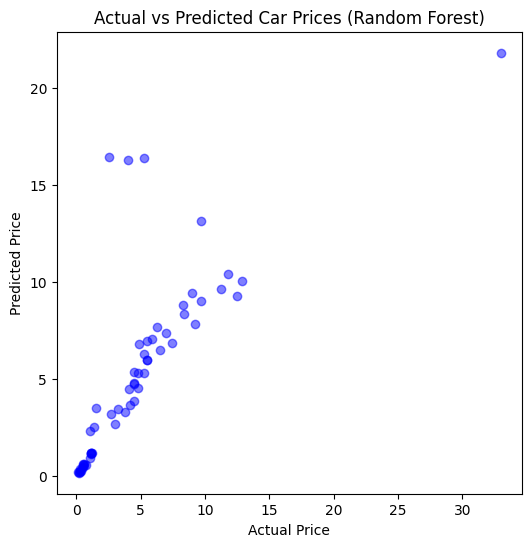

In [ ]:
# ==============================
# Step 8: Visualization
# ==============================
import matplotlib.pyplot as plt

# Scatter plot for Actual vs Predicted Prices (using Random Forest)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.show()